In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')
target_attribute = "Price"

In [3]:
USAhousing.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [4]:
threshold = 0

missing = ((USAhousing.isnull().sum() / len(USAhousing)) * 100).round(2)
filtered = missing[missing > threshold].reset_index()
filtered.columns = ['Attribute', 'Missing Percentage']

# Format and sort the DataFrame
filtered['Missing Percentage'] = filtered['Missing Percentage'].apply(lambda x: f"{x:.2f}%")
sorted_df = filtered.sort_values(by='Missing Percentage').style.hide()

# Check if the underlying DataFrame is empty
if len(sorted_df.data) == 0:
    threshold = -1
    print("No empties!")

sorted_df

No empties!


Attribute,Missing Percentage


In [5]:
USAhousing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


In [6]:
attributes_to_drop = []

# We know address won't contribute anything unless if we may do some feature engineering on it.
attributes_to_drop.append("Address")

# EDA

Let's create some simple plots to check out the data!

In [7]:
# sns.pairplot(USAhousing)

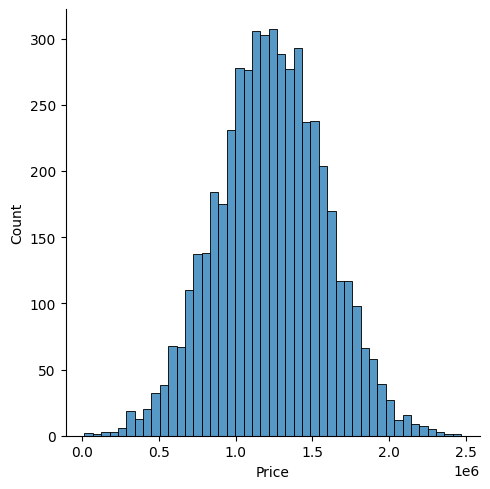

In [8]:
# Looking into our target attribute
sns.displot(USAhousing['Price'])

<Axes: >

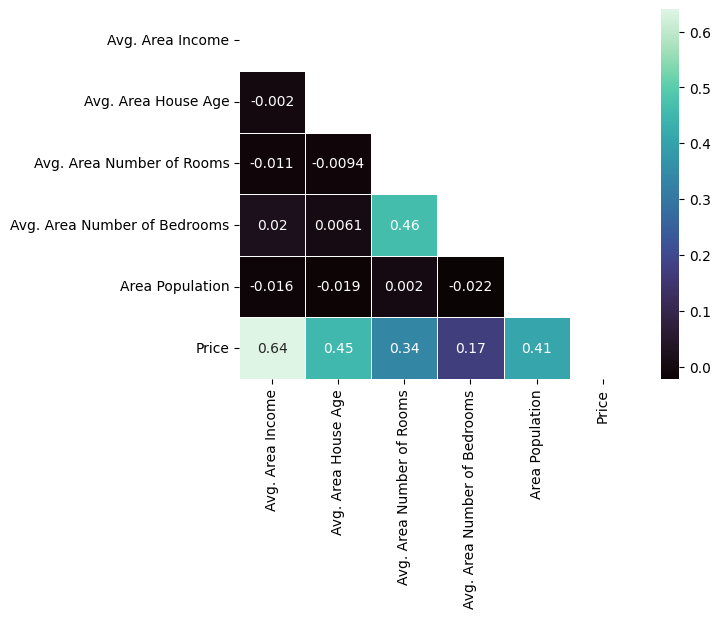

In [9]:
# Create a correlation matrix for numeric columns in the DataFrame
corr_matrix = USAhousing.corr(numeric_only=True)

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix))

# Color options
diverging_cmap = 'coolwarm'
zero_continous_cmap = 'mako'

# Plot a heatmap of the correlation matrix with the mask
sns.heatmap(corr_matrix, linewidths=0.5, mask=mask, cmap=zero_continous_cmap, annot=True)

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Now that we don't need the target variable to analyze anymore
attributes_to_drop.append(target_attribute)


cleaned_DF = USAhousing.drop(attributes_to_drop, axis = 1)
target_variable = USAhousing[target_attribute]

X_train, X_test, y_train, y_test = train_test_split(cleaned_DF, target_variable, test_size=0.3, random_state=101)


lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

## Creating and Training the Model

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [11]:
# print the intercept
print(lm.intercept_)

-2641372.6673014304


In [36]:
def left_align_column(s):
    return f'text-align: left'

coeff_df = (
    pd.DataFrame({'Coefficient': lm.coef_.round(2)}, index=cleaned_DF.columns)
    .sort_values(by='Coefficient', ascending=True)
    .style.format({'Coefficient': "${:,.2f}"})
)
coeff_df.columns.name = 'Attributes'

coeff_df


Attributes,Coefficient
Area Population,$15.23
Avg. Area Income,$21.62
Avg. Area Number of Bedrooms,"$1,318.72"
Avg. Area Number of Rooms,"$121,405.38"
Avg. Area House Age,"$165,221.12"


Interpreting the coefficients:

- A one unit increase in **Avg. Area Income** is associated with an **increase of $21.52**.
- A one unit increase in **Avg. Area House Age** is associated with an **increase of $164883.28**.
- A one unit increase in **Avg. Area Number of Rooms** is associated with an **increase of $122368.67**.
- A one unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of $2233.80**.
- A one unit increase in **Area Population** is associated with an **increase of $15.15**.

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [13]:
predictions = lm.predict(X_test)

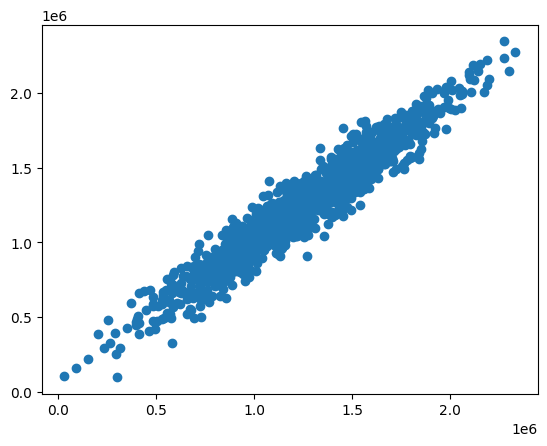

In [14]:
plt.scatter(y_test,predictions)

**Residual Histogram**

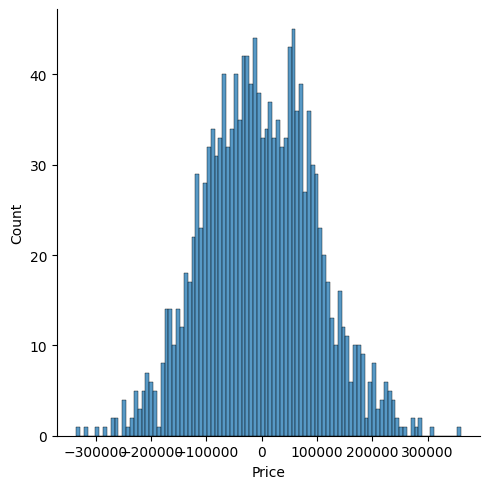

In [15]:
sns.displot((y_test-predictions),bins=100);

## Regression Evaluation Metrics

**Root Mean Squared Error** (RMSE) Punishes large errors and is interpretable:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$



In [16]:
from sklearn import metrics

error = (np.sqrt(metrics.mean_squared_error(y_test, predictions))).round(2)

print(f'RMSE: ${error}')

RMSE: $100842.08
